# Multi-Layered Perceptron

## Laden des Digits-Datensatzes

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y, images = digits.data, digits.target, digits.images

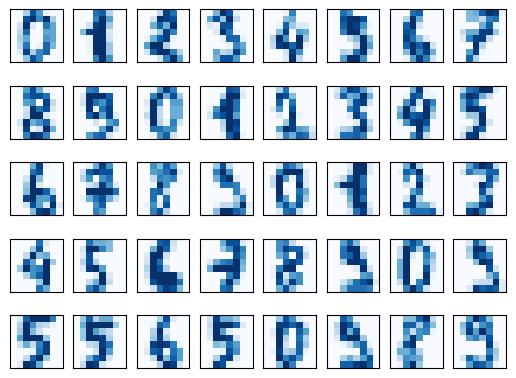

In [2]:
import matplotlib.pyplot as plt

def gallery(images, rows, cols, cmap=None):
    for n in range(rows * cols):          
        plt.subplot(rows, cols,n+1)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)          
        plt.imshow(images[n], cmap) 

gallery(images,5,8,cmap='Blues') 
plt.show()    

### Aufteilung der Daten

In [3]:
train_size = int(0.7 * len(X))

X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

## Erzeugung und Training des Klassifizieres


**MLPClassifier** steht für *Multi-Layer Perceptron Classifier*. Dieser implementiert ein mehrschichtiges Perzeptron (ein künstliches neuronales Netzwerk) das durch den Backpropagation-Algorithmus trainiert wird.

Ein mehrschichtiges Perzeptron (MLP) ist ein Klassifikationsalgorithmus, der in der Lage ist, nicht-lineare Modelle zu lernen. Es besteht aus mindestens drei Schichten von Knoten: einer Eingabeschicht, einer oder mehreren "verborgenen" Schichten und einer Ausgabeschicht. Jede Schicht besteht aus Neuronen, wobei die Neuronen in einer Schicht mit denen in der nächsten Schicht verbunden sind.

### Die Parameter des MLPClassifier
Die MLPClassifier-Klasse in sklearn hat viele Parameter. Einige der wichtigsten:

- `hidden_layer_sizes`: Eine Liste, die die Anzahl der Neuronen in den verborgenen Schichten angibt.
- `activation`: Die Aktivierungsfunktion für die Neuronen. Dies kann 'logistic' (Sigmoid), 'tanh', 'relu' oder 'identity' sein.
- `solver`: Der Optimierer, der verwendet wird, um die Gewichte anzupassen. Dies kann 'lbfgs', 'sgd' (stochastischer Gradientenabstieg) oder 'adam' sein.
- `alpha`: Ein Regularisierungsparameter, der Overfitting verhindert.
- `learning_rate_init`: Die anfängliche Lernrate für die Gewichtsanpassungen.

Es ist eine der Aufgaben beim Deep Learning, die besten Parameter durch Experimentieren (und Erfahrung?) zu bestimmen.

In [4]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes = 64, max_iter=1000)

mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=64, max_iter=1000)

## Wie gut arbeitet der Klassifizierer?

Die genauigkeit überprüfen wikr mit den Testdaten:

In [5]:
score = mlpc.score(X_test, y_test)
print(f'Genauigkeit: {score:.1%}')

Genauigkeit: 91.9%
